In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 

%matplotlib inline

In [2]:
df = pd.read_csv('monteverdi.csv')
df.describe(include="all")

,x1,x2,y
count,200.000000,200.000000,200.000000
mean,2.632505,-0.108903,2.000000
std,4.941135,6.784496,1.417762
min,-7.991026,-14.401883,0.000000
25%,-1.848268,-6.449734,1.000000
50%,3.596677,2.235137,2.000000
75%,6.640721,6.019224,3.000000
max,11.529146,10.831912,4.000000


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

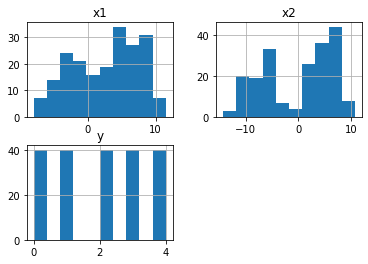

In [3]:
df.hist()

In [4]:
df.y.value_counts()

4    40
3    40
2    40
1    40
0    40
Name: y, dtype: int64

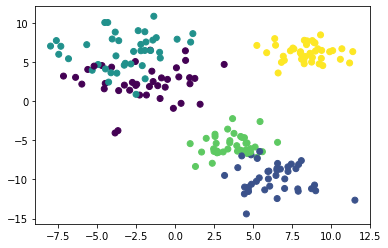

In [5]:
plt.scatter(df.x1.values, df.x2.values, c=df.y.values)

In [6]:
print(df.x1.min(), df.x1.max())
print(df.x2.min(), df.x2.max())

-7.991025564047604 11.52914614902176
-14.40188344253973 10.831911978966632


- Il s'agit de classification (supervisée).
- On a 5 classes à prédire.
- Notre domaine est R² (x1,x2)
    - x1 € [-7.991025564047604, 11.52914614902176]
    - x2 € [-14.40188344253973 10.831911978966632]

In [7]:
X = scale(df.loc[:,["x1","x2"]])  # On scale car x1 et x2 n'ont pas des moyennes centrées en 0
y = df.drop(["x1", "x2"], axis=1)

In [8]:
Xtensor = torch.tensor(X.astype(np.float32))
ytensor = torch.tensor(y.values.astype(np.int)).squeeze(1)

print(Xtensor.shape)
print(ytensor.shape)

torch.Size([200, 2])
torch.Size([200])


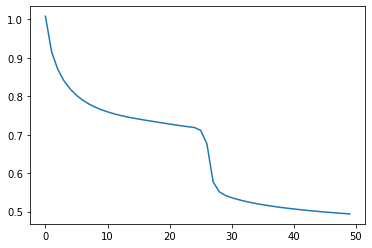

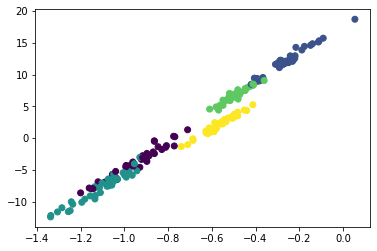

In [9]:
model1 = torch.nn.Sequential(
            torch.nn.Linear(2, 2), # 2 input, 2 unit for hidden
            torch.nn.ReLU(),
            torch.nn.Linear(2, 5), # 2 hidden, 5 output
            torch.nn.LogSoftmax(dim=1) # LogSoftmax pour la multi class
            )
loss_fn = torch.nn.NLLLoss() # NLLLoss car on a plusieurs classes

lr = 0.2
loss_descent = []
for t in range(5000):
    y_pred = model1(Xtensor) # forward pass
    loss = loss_fn(y_pred, ytensor)

    if t % 100 == 99:
        loss_descent.append(loss.item())

    model1.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model1.parameters():
            param -= lr * param.grad
            
plt.plot(loss_descent)        
plt.show()

l1 = model1[0]
W1 = l1.weight.detach().numpy()
b1 = l1.bias.detach().numpy()
phi_X = W1.dot(X.transpose()).transpose()+b1
plt.scatter(phi_X[:,0], phi_X[:,1], c=ytensor)

- On remarque que la loss converge
- Par contre on fait encore bcp d'erreur
- Les points ne sont pas bien séparés.

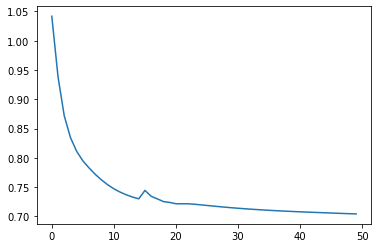

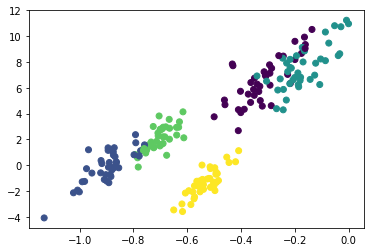

In [10]:
model2 = torch.nn.Sequential(
            torch.nn.Linear(2, 2), # 2 input, 2 unit for hidden
            torch.nn.ReLU(),
            torch.nn.Linear(2, 5), # 2 hidden, 5 output
            torch.nn.LogSoftmax(dim=1) # SoftMax pour la multi class
            )
loss_fn = torch.nn.CrossEntropyLoss() # CrossEntropy car on a plusieurs classes

lr = 0.2
loss_descent = []
for t in range(5000):
    y_pred = model2(Xtensor) # forward pass
    loss = loss_fn(y_pred, ytensor)

    if t % 100 == 99:
        loss_descent.append(loss.item())

    model2.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model2.parameters():
            param -= lr * param.grad
            
plt.plot(loss_descent)        
plt.show()

l1 = model2[0]
W1 = l1.weight.detach().numpy()
b1 = l1.bias.detach().numpy()
phi_X = W1.dot(X.transpose()).transpose()+b1
plt.scatter(phi_X[:,0], phi_X[:,1], c=ytensor)

- On remarque que la loss converge (mais moins bien que la NLLLoss)
- Par contre on fait encore bcp d'erreur
- Les points ne sont pas bien séparés.

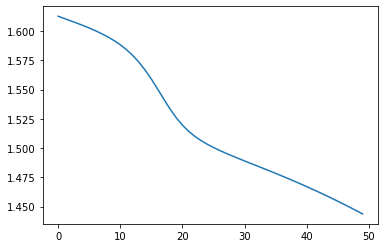

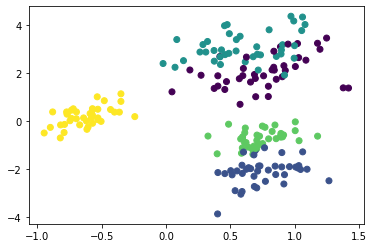

In [11]:
model2 = torch.nn.Sequential(
            torch.nn.Linear(2, 2), # 2 input, 2 unit for hidden
            torch.nn.ReLU(),
            torch.nn.Linear(2, 5), # 2 hidden, 5 output
            torch.nn.Softmax(dim=1) # SoftMax pour la multi class
            )
loss_fn = torch.nn.CrossEntropyLoss() # NLLLoss car on a plusieurs classes

lr = 0.01
loss_descent = []
for t in range(5000):
    y_pred = model2(Xtensor) # forward pass
    loss = loss_fn(y_pred, ytensor)

    if t % 100 == 99:
        loss_descent.append(loss.item())

    model2.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model2.parameters():
            param -= lr * param.grad
            
plt.plot(loss_descent)        
plt.show()

l1 = model2[0]
W1 = l1.weight.detach().numpy()
b1 = l1.bias.detach().numpy()
phi_X = W1.dot(X.transpose()).transpose()+b1
plt.scatter(phi_X[:,0], phi_X[:,1], c=ytensor)

- On remarque que la loss converge (mais moins bien que la NLLLoss)
    - Les valeurs sont trop grande (à cause du Softmax ??)
- Par contre on fait encore bcp d'erreur
- Les points ne sont pas bien séparés.

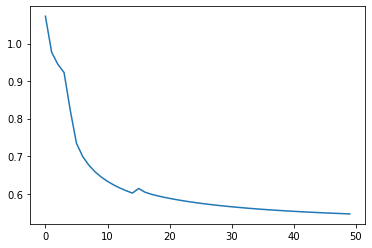

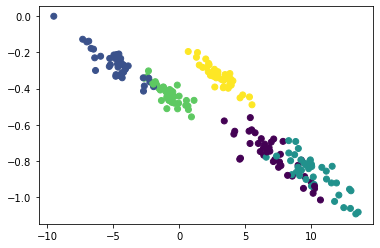

In [12]:
model2 = torch.nn.Sequential(
            torch.nn.Linear(2, 2), # 2 input, 2 unit for hidden
            torch.nn.ReLU(),
            torch.nn.Linear(2, 5), # 2 hidden, 5 output
            torch.nn.LogSoftmax(dim=1) # SoftMax pour la multi class
            )
loss_fn = torch.nn.NLLLoss() # NLLLoss car on a plusieurs classes

lr = 0.2
loss_descent = []
for t in range(5000):
    y_pred = model2(Xtensor) # forward pass
    loss = loss_fn(y_pred, ytensor)

    if t % 100 == 99:
        loss_descent.append(loss.item())

    model2.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model2.parameters():
            param -= lr * param.grad
            
plt.plot(loss_descent)        
plt.show()

l1 = model2[0]
W1 = l1.weight.detach().numpy()
b1 = l1.bias.detach().numpy()
phi_X = W1.dot(X.transpose()).transpose()+b1
plt.scatter(phi_X[:,0], phi_X[:,1], c=ytensor)

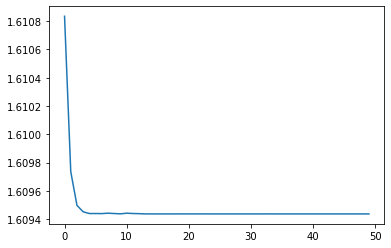

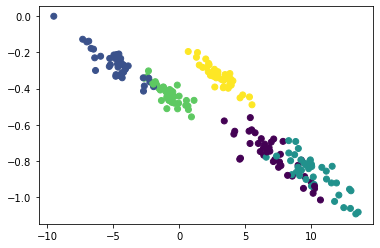

In [13]:
model3 = torch.nn.Sequential(
            torch.nn.Linear(2, 3), # 2 input, 2 unit for hidden
            torch.nn.ReLU(),
            torch.nn.Linear(3, 2), # 2 input, 2 unit for hidden
            torch.nn.ReLU(),
            torch.nn.Linear(2, 5), # 2 hidden, 5 output
            torch.nn.ReLU(),
            torch.nn.LogSoftmax(dim=1) # SoftMax pour la multi class
            )
loss_fn = torch.nn.NLLLoss() # NLLLoss car on a plusieurs classes

lr = 0.2
loss_descent = []
for t in range(5000):
    y_pred = model3(Xtensor) # forward pass
    loss = loss_fn(y_pred, ytensor)

    if t % 100 == 99:
        loss_descent.append(loss.item())

    model3.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model3.parameters():
            param -= lr * param.grad
            
plt.plot(loss_descent)        
plt.show()

l1 = model2[0]
W1 = l1.weight.detach().numpy()
b1 = l1.bias.detach().numpy()
phi_X = W1.dot(X.transpose()).transpose()+b1
plt.scatter(phi_X[:,0], phi_X[:,1], c=ytensor)

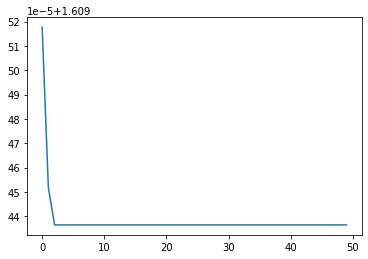

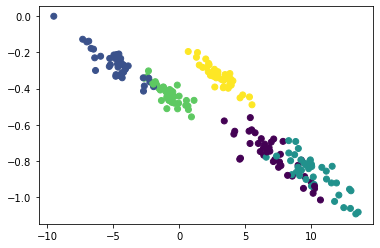

In [14]:
model3 = torch.nn.Sequential(
            torch.nn.Linear(2, 3), # 2 input, 2 unit for hidden
            torch.nn.ReLU(),
            torch.nn.Linear(3, 2), # 2 input, 2 unit for hidden
            torch.nn.ReLU(),
            torch.nn.Linear(2, 5), # 2 hidden, 5 output
            torch.nn.ReLU(),
            torch.nn.LogSoftmax(dim=1) # SoftMax pour la multi class
            )
loss_fn = torch.nn.CrossEntropyLoss() # CrossEntropyLoss car on a plusieurs classes

lr = 0.2
loss_descent = []
for t in range(5000):
    y_pred = model3(Xtensor) # forward pass
    loss = loss_fn(y_pred, ytensor)

    if t % 100 == 99:
        loss_descent.append(loss.item())

    model3.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model3.parameters():
            param -= lr * param.grad
            
plt.plot(loss_descent)        
plt.show()

l1 = model2[0]
W1 = l1.weight.detach().numpy()
b1 = l1.bias.detach().numpy()
phi_X = W1.dot(X.transpose()).transpose()+b1
plt.scatter(phi_X[:,0], phi_X[:,1], c=ytensor)

- On remarque que l'ajout d'une couche permet de mieux séparer les données.
- On remarque que la loss ne converge pas toujours.
- Pas eu assez le temps pour marquer les diff à cause des loss fonc
- J'ai eu des erreur de représentation à cause du squeez (??)